<img src="../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Neuropixels Dataset Exercises </h1> 
<h2 align="center">Summer Workshop on the Dynamic Brain </h2> 
<h3 align="center">Wednesday, August 28, 2019</h3> 

<img src="../resources/EphysObservatory/neuropixels.png" height="250" width="250"> 

In [91]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys import ecephys_session
%matplotlib inline

# fix slow autocomplete
%config Completer.use_jedi = False

In [92]:
import platform
platstring = platform.platform()

if 'Darwin' in platstring:
    # OS X 
    data_root = "/Volumes/Brain2019/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn1' in platstring):
    # then on AWS
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2019/"

manifest_path = os.path.join(data_root, "dynamic-brain-workshop/visual_coding_neuropixels/2019/manifest.json")

# Exercises

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 1: Recordings across visual areas</b> 
<br>
Make raster plots for 20 units in each of the 6 visual areas ('VISp','VISl','VISal','VISrl','VISam','VISpm') for the first 5 minutes of the sessions.
<ol>
<li> Select a session that has data in all 6 areas
<li> Loop over these 6 areas
<li> Loop over 20 units per area, get their spike times, and plot them in a raster plot
</ol>
</div>

In [93]:
cache = EcephysProjectCache.fixed(manifest=manifest_path)

In [131]:
sessions = cache.get_sessions()


In [95]:
sessions.shape

(18, 11)

In [96]:
sessions.head()

,session_type,specimen_id,genotype,gender,age_in_days,project_code,probe_count,channel_count,unit_count,has_nwb,structure_acronyms
id,,,,,,,,,,,
737581020,brain_observatory_1.1,718643567,wt,M,108.0,NeuropixelVisualCoding,6,396,601,True,"[CA, DG, MB, TH, VISl, VISmma, VISp, VISpm, VI..."
739448407,brain_observatory_1.1,716813543,wt,M,112.0,NeuropixelVisualCoding,6,422,654,True,"[CA, DG, MB, TH, VIS, VISam, VISl, VISp, VISrl..."
744228101,brain_observatory_1.1,719817805,wt,M,122.0,NeuropixelVisualCoding,6,433,696,True,"[CA, DG, MB, TH, VIS, VISal, VISl, VISp, VISrl..."
746083955,brain_observatory_1.1,726170935,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,F,98.0,NeuropixelVisualCoding,6,412,628,True,"[CA, DG, MB, TH, VISal, VISl, VISp, VISpm, VIS..."
750749662,brain_observatory_1.1,726162197,wt,M,92.0,NeuropixelVisualCoding,6,509,813,True,"[CA, DG, MB, TH, VISal, VISam, VISl, VISp, VIS..."


In [97]:
visual_regions = ['VISp','VISl','VISal','VISrl','VISam','VISpm']
#unit id is a dictionary key to access the spike times and waveform dictionary

In [98]:
visual_sess = []
for index in sessions.index:
    areas = sessions.structure_acronyms.loc[index]
    visual_areas = [x for x in visual_regions if x in areas]
    if len(visual_areas) == 6:
            visual_sess.append(index)
print(visual_sess)

[750749662, 755434585, 756029989]


In [144]:
session_1 = cache.get_session_data(750749662)
session_units = session_1.units
type(session_units)


pandas.core.frame.DataFrame

In [145]:
session_units

,PT_ratio,amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,l_ratio,...,channel_local_index,structure_acronym,structure_id,probe_horizontal_position,probe_id,probe_vertical_position,probe_description,location,sampling_rate,lfp_sampling_rate
unit_id,,,,,,,,,,,,,,,,,,,,,
914686337,0.562802,172.518840,0.002892,4,390.69,5.602064,9.216453,0.111477,69.462814,0.002254,...,5,TH,549.0,11,769322802,60,probeA,,29999.966623,2499.997219
914686339,0.654514,141.937380,0.001844,5,493.04,5.614530,43.965753,0.009307,129.061027,0.001981,...,6,TH,549.0,59,769322802,80,probeA,,29999.966623,2499.997219
914686347,0.399403,150.047820,0.002267,9,293.25,6.036566,40.149059,0.007072,118.832154,0.000019,...,8,TH,549.0,43,769322802,100,probeA,,29999.966623,2499.997219
914686353,0.513707,209.994135,0.000712,12,169.10,5.743368,36.786487,0.023398,117.385050,0.000856,...,13,TH,549.0,11,769322802,140,probeA,,29999.966623,2499.997219
914686359,0.589894,179.716485,0.054723,15,204.77,4.307685,30.350855,0.022162,93.632331,0.008495,...,14,TH,549.0,59,769322802,160,probeA,,29999.966623,2499.997219
914686357,0.750337,189.935070,0.022374,14,714.08,3.728679,1.019301,0.182272,40.767992,0.011082,...,14,TH,549.0,59,769322802,160,probeA,,29999.966623,2499.997219
914686363,0.476434,204.496110,0.000065,17,243.13,4.368931,28.854695,0.002729,89.247463,0.006610,...,17,TH,549.0,11,769322802,180,probeA,,29999.966623,2499.997219
914686377,0.445218,180.475230,0.042714,24,142.82,5.822271,41.897544,0.023885,128.362544,0.001007,...,21,TH,549.0,11,769322802,220,probeA,,29999.966623,2499.997219
914686375,0.447029,217.003410,0.000406,23,301.73,4.054877,34.399866,0.004673,102.835273,0.000658,...,20,TH,549.0,43,769322802,220,probeA,,29999.966623,2499.997219


In [166]:
for ii in session_units[session_units.structure_acronym == "VISp"].index:
    print(ii)

914688507
914688515
914688527
914688525
914688533
914688539
914688547
914688545
914688561
914688575
914688583
914688571
914688567
914688577
914688589
914688599
914688607
914688605
914688603
914688601
914688629
914688643
914688641
914688639
914688635
914688637
914688651
914688649
914688663
914688661
914688657
914688677
914688675
914688693
914688689
914688879
914688685
914688683
914688725
914688719
914688717
914688715
914688721
914688713
914688711
914688697
914688735
914688739
914688757
914688771
914688769
914688767
914688787


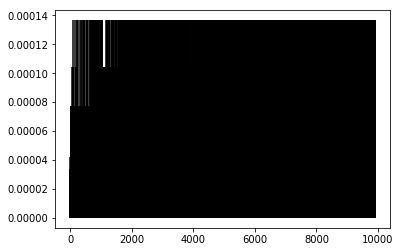

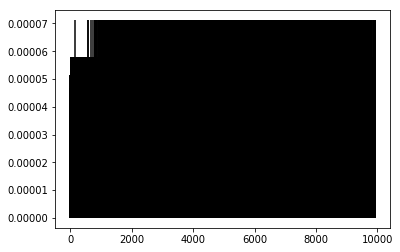

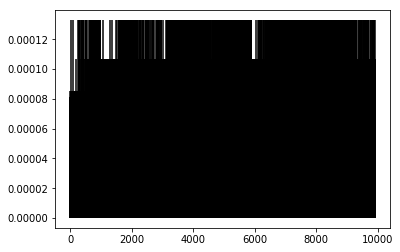

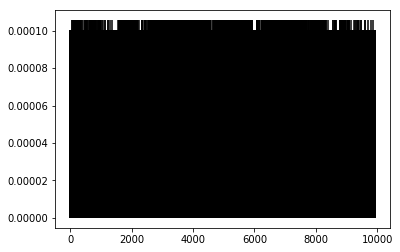

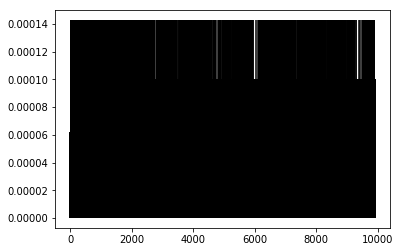

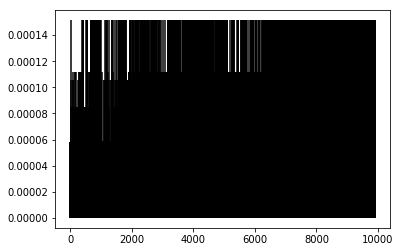

In [172]:
#write function to select subset of a dictionary
for index, name in enumerate(visual_regions):
    region_units = session_units[session_units.structure_acronym == name].index
    fig, ax = plt.subplots()
    
    for index, name in enumerate(region_units[:20]):
        spikes = session_1.spike_times[name]
        num_units = len(spikes)
        ystep = 1 / num_units
        ymin = 0
        ymax = ystep
        plt.vlines(spikes, ymin, ymax)
        ymin += ystep
        ymax += ystep

    
    plt.show()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 2: ISI distributions</b>
<ol>
    <li>For a single unit, plot the inter-spike interval distribution with 1 ms bins. Show 2 graphs with different x-limits: (0, 20 ms) and (0, 200 ms).
    
</ol>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
  
Hints: Use the function np.diff to compute the difference between adjacent spike times (i.e. the inter-spike interval). 
</div>

In [185]:
spike_times = session_1.spike_times
unit_one = spike_times[session_1.units.index[0]]
unit_one
ISI_unit_one = np.diff(unit_one, n=1)
ISI_unit_one


array([0.65920073, 2.36820263, 1.51356835, ..., 0.02436669, 0.10280011,
       0.03403337])

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  6.,  0.,  0.,  0.,  6.,  0.,  0.,  1.,  0.,  0.,
         7.,  0.,  0.,  0.,  4.,  0.,  0.,  3.,  0.,  0.,  4.,  0.,  0.,
         0.,  7.,  0.,  0.,  8.,  0.,  0.,  9.,  0.,  0.,  0.,  5.,  0.,
         0.,  8.,  0.,  0.,  4.,  0.,  0.,  0.,  5.,  0.,  0.,  5.,  0.,
         0.,  3.,  0.,  0.,  0.,  6.,  0.,  0.,  6.,  0.,  0.,  6.,  0.,
         0.,  0., 10.,  0.,  0.,  6.,  0.,  0.,  9.,  0.,  0.,  0.,  9.,
         0.,  0.,  2.,  0.,  0.,  7.,  0.,  0.,  0.,  4.,  0.,  0.,  7.,
         0.,  0.,  9.,  0.,  0.,  0.,  8.,  0.,  0.,  6.,  0.,  0.,  7.,
         0.,  0.,  0.,  9.,  0.,  0.,  5.,  0.,  0.,  7.,  0.,  0.,  0.,
         3.,  0.,  0.,  4.,  0.,  0.,  6.,  0.,  0.,  0.,  7.,  0.,  0.,
         8.,  0.,  0.,  9.,  0.,  0.,  0., 10.,  0.,  0., 14.,  0.,  0.,
        14.,  0.,  0.,  0., 16.,  0.,  0.,  6.,  0.,  0., 10.,  0.,  0.,
         0., 12.,  0.,  0., 17.,  0.,  0., 18.,  0.

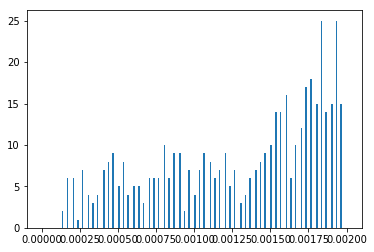

In [190]:
plt.hist(ISI_unit_one, bins = 200, range={0,0.002})

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 2 continued: ISI distributions</b>
<ol>
    <li>Get spike times for 50 units with highest SNR </li>
    <li>Provided that the unit has at least 3000 spikes, plot ISI distribution for each unit (a single plot each).</li>
    <li>How do the ISI distributions vary between cells?</li>
</ol>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
  
Hints:  `plt.subplots(...sharex=True)` will help keep all your subplots on the same scale automatically so they can be easily compared.
</div>

In [211]:
highest_snr = session_1.units.snr.sort_values()[-50:]
highest_snr.shape

(50,)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 5: Explore responses to natural scenes</b> 
<ol>
    <li>Construct a stim_table for natural scenes, and use `get_stimulus_parameter_values` to list the possible values for all stimulus parameters. How many different images are presented? What do you think frame=-1 is?</li>
    <li>Use the presentationwise_spike_counts method to calculate the spike counts in 5 ms bins, for all presentations of a chosen image. Use a window extending one full stimulus presentation before and after the presentation of interest (showing three presentations total). Then take the mean across presentations to find the PSTH. 
    <li>Plot the histogram (as in step above) for all images separately.
    <li>Plot the image that drives the largest response for this unit.
    
</ol>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 5 continued: Explore responses to natural scenes</b> 
<ol>
    <li>Create a `conditionwise_spike_statistics` table for these stimuli.</li>
    <li>Plot the mean ± sem of the response to each image, add a dotted line (plt.axhline()) to represent the response to the blank sweep (frame=-1). Bonus: Use plt.axhspan() to shade the sem of the blanksweep. </li>

</ol>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 5 continued: Explore responses to natural scenes</b> 
Some neurons have broad responses to lots of images, others respond only to a single or few images. One way to quantify this type of selectivity is using the <b>lifetime sparseness</b> metric. A high value of this metric indicates high selectivity - a differential response to one or a few stimulus conditions over others. A low value of this metric indicates a similar response across all conditions.   

<ol>
    <li>Compute the lifetime sparseness for the unit you plotted above.</li>
    <li>Extra credit: compute the lifetime sparseness for several units in your experiment. What's the range of values you see? Compare with the tuning plots you computed above for those neurons - make plots as the one directly above this and add the lifetime sparseness as a title.</li>

</ol>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 6: Population correlations and cross-correlograms of spiking activity</b>
<br>
The neural activity is often correlated between the neurons. The relationship between the activity of two units at different time lags is quantified by the cross-correlation. When the cross-correlation is plotted with respect to time lag, we call this a cross-correlogram.
<br>
We can also calculate a single correlation coefficient (at zero lag) for all pairs of recorded units, and visualize this using a matrix representation. In this exercise, you will compute the correlation matrix and compare it between different stimulus presentaitons.
<ol>
    <li>Correlations can be studied on many different timescales. Here we'll use a 10 ms timescale, so use `presentationwise_spike_counts` to create spike histograms for 10 ms time bins for both drifting gratings and spontaneous activity. Call the output 'histograms_drift' and 'histograms_spont'
    <li>Compute the cross_correlograms for two arbitatrary units during spontaneous activity and during drifting gratings presentation. Make sure you are using the same duration for the two stimulis as different stimuli have different length of presentation. Use the `scipy.signal.correlate` function to calculate the cross-correlation. Plot these cross_correlograms. How do they look different?
</ol>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 6 continued: Population correlations and cross-correlograms of spiking activity</b>
<br>
The neural activity is often correlated between the neurons. The relationship between the activity of two units at different time lags is quantified by the cross-correlation. When the cross-correlation is plotted with respect to time lag, we call this a cross-correlogram.
<br>
We can also calculate a single correlation coefficient (at zero lag) for all pairs of recorded units, and visualize this using a matrix representation. In this exercise, you will compute the correlation matrix and compare it between different stimulus presentaitons.
<ol>
    <li>Compute the linear pearson correlation coefficients for all pairs of the first 100 units, and store them as a correlation matrix. Use `scipy.stats.pearsonr` function. Visualise the matrix using imshow() command. Hint: if the values are constant, it makes sense to assume the correlation to be zero. </li>
    <li>Compare the correlation matrix structure for spontaneous actiivty and drifting gratings for the same units. Hint: to make it more clear, plot the correlations using log10(corr + 1) scaling.</li>
</ol>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 7: Spike waveform features</b> 
<br>Compute the spike duration for your selected list of units, and plot histogram of values.
<ol>
    <li>Concatenate waveforms in a matrix</li>
    <li>Compute location of trough and peak using np.argmax() and np.argmin()</li>
    <li>Compute difference between time of trough and peak</li>
    <li>Plot histogram of spikes duration (time between trough and peak)</li>
    <li>Bonus: construct a scatter plot comparing your results with the pre-calculated values in the units table, `session.units.waveform_duration`</li>
</ol>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 8: Spike-field relationships</b> 
<br>
The LFP is the product of the coordinated activity of a large number of cells localized near the probe, many more than those for which we have identified spikes. Thus, one way of understanding relationships between single neurons and the population is to look at relationships between spike times and the LFP. 
<br>
Here we will calculate the spike-triggered average of the LFP signal. If a certain pattern is repeated in the LFP whenever the cell fires, the averaging will help to isolate this signal and average out the noise. 
<ol>
    <li>Pick a unit, extract the LFP for the channel closest to it's peak channel, and select a subset of spikes to work with. (Working with the full dataset across channels and across all spiikes would take quite a while.) </li>
    <li>For each spike time of the unit, pick out a fixed window of the LFP aligned around the spike time. </li>
    <li>Average the windowed LFP signals to compute the spike-triggered average, and plot the results. Do you think this would look different if we had picked a channel further from the cell?</li>
</ol>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 9: Instantaneous phase of oscillatory LFP signals</b> 
<br>
Another way to analyze how an oscillatory signal varies with time is to extract its instantaneous amplitude using a mathematical tool called the Hilbert transform. The function `scipy.signal.hilbert` adds a second dimension to a signal (as a complex variable), such that the resulting *analytic signal* now has a well-defined nonzero amplitude and phase at every instant in time! (See http://www.rdgao.com/roemerhasit_Hilbert_Transform/ for a nice explanation.)
<br>
Note that these instantaneous amplitude and phase could be a starting point for more complex analysis of relationships between spike times and the LFP, or between LFP signals in different regions. We won't have time to get into that here!
<ol>
    <li>Working with a ~10 sec window of LFP from a single channel, find the peak frequency of the signal using the welsh periodogram.</li>
    <li>Filter the signal using the Butterworth filter, using a window of +/- 2 Hz around the peak frequency.</li>
    <li>Calculate the analytic signal from your filtered LFP </li>
    <li>Use `np.abs` and `np.angle` to calculate the amplitude and phase of the signal. Visualize the filtered LFP along with its amplitude and phase.</li>
</ol>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Bonus! Exercise 10: Explore tuning curves for static gratings, using seaborn plotting tools.</b> 
<ol>
    <li>Construct a stim_table for static gratings, and use `get_stimulus_parameter_values` to list the possible values for all stimulus parameters.</li>
    <li>Create a `presentationwise_spike_counts` table for these stimuli, using a single bin covering the full duration of the presentation. Convert the output to a dataframe (`to_dataframe` method), and merge to the stim table to link the spike counts to the stimulus parameters.</li>
    <li>Follow the examples below to show the tuning of the cell across two and three dimensions of stimulus parameters, respectively.</li>
    <li>Explore variations on these plots by changing which columns are assigned to the `x`, `hue`, and `col` parameters. You can also show a single plot with one stimulus parameter left out to aggregate across that parameter. Which combination do you feel represents the data most intuitively? (We'll always want to keep `y="spike_counts"`, since that is the dependent variable here.)</li>
    <li>If you have time, follow the same steps for driting gratings for the same cell and compare the results.</li>
</ol>
</div>

**Hint: Tuning across two stimulus dimensions**

First, assign to the variable `data` a subset of the spike counts dataframe for a specific unit id and spatial frequency. Then run the code below.

In [ ]:
import seaborn as sns
y = "spike_counts"
x = "orientation"
hue = "phase"
sns.pointplot(data=data, x=x, y=y, hue=hue, dodge=True)

**Hint: Tuning across three stimulus dimensions**

This time, assign to the variable `data` a subset of the spike counts dataframe containing all data for a single unit. Then run the code below.

In [ ]:
# We want to ignore the 'null' sweeps. By setting them to NaN, seaborn will automatically ignore them.
data = data.replace('null', np.nan)
y = "spike_counts"
x = "orientation"
hue = "phase"
col = "spatial_frequency"
sns.catplot(data=data, col=col, x=x, y=y, hue=hue, col_wrap=3, kind='point')